In [8]:
import numpy as np
import numpy.ma
from astropy.io import fits
from astropy.modeling import models, fitting
import matplotlib.pyplot as plt
from scipy import ndimage
import scipy.interpolate as interp
import os.path
from astropy.io import fits
from astropy.wcs import WCS

In [9]:
file ="20231214_27_smoothed.fits"
hdul = fits.open(file)
data = hdul[0].data
h1a = hdul[0].header
obj_name = h1a.get('OBJECT', 'Unknown')
print(data.shape)
print(h1a)

(2, 110276)
SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    2 / Number of axes                                 NAXIS1  =               110276 / Axis length                                    NAXIS2  =                    2 / Axis length                                    EXTEND  =                    T / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        IRAF-TLM= '2024-02-14T17:14:49' / Time of last modification                     OBJECT  = 'Gaia DR3 3107091187177468416 first fiber' / Name of the object observ                                                                                                                                                                CRPIX1  =               -1647. / Reference pixel                                CRVAL1  =         3827.07138

<>:11: SyntaxWarning: invalid escape sequence '\l'
<>:11: SyntaxWarning: invalid escape sequence '\l'
/var/folders/j1/8cybr_w118g62wr61rgcz31m0000gn/T/ipykernel_62550/1258812901.py:11: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel("Wavelength ($\lambda$) in $\AA$ ")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Gaia DR3 3107091187177468416 first fiber


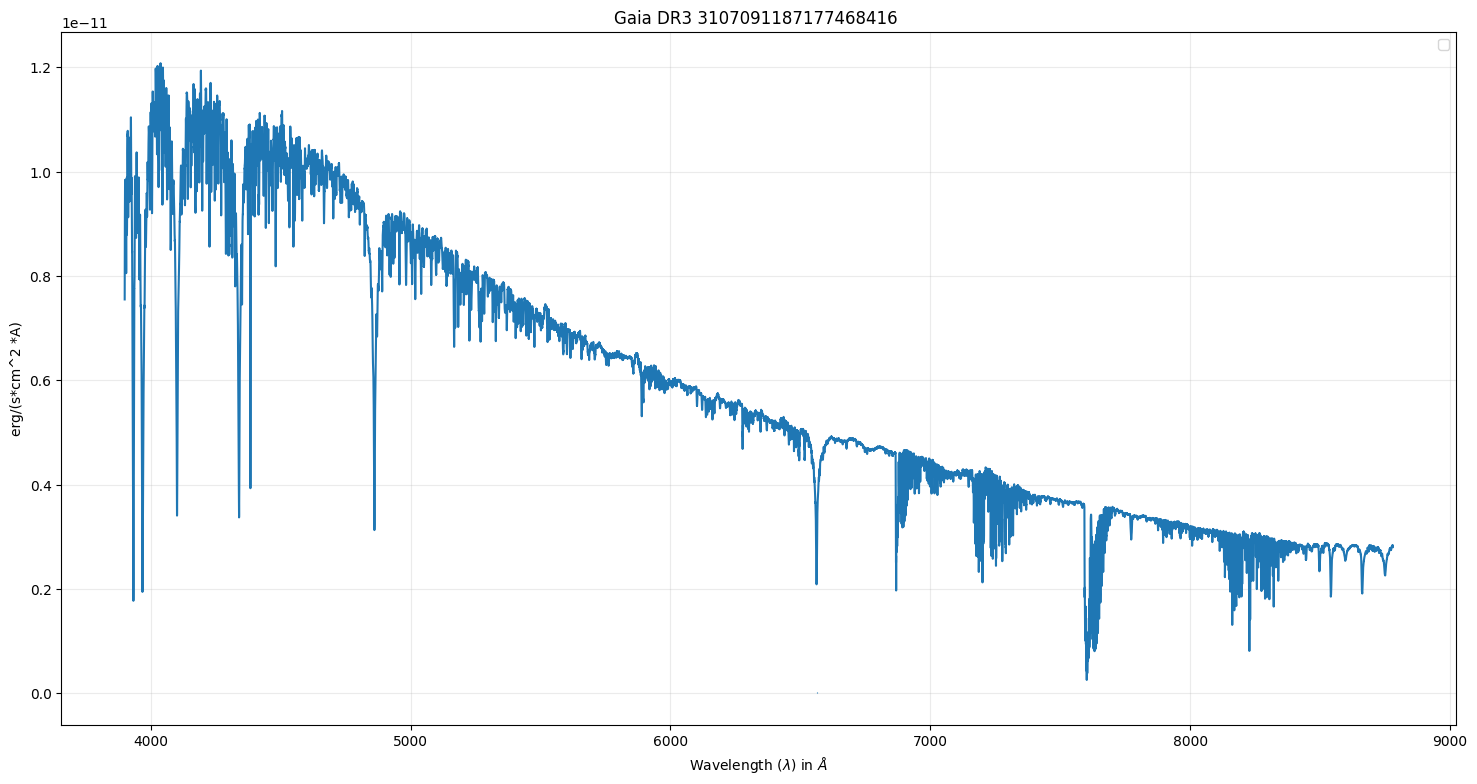

In [10]:
fluxa = data[0]
w = WCS(h1a, naxis=1, relax=False, fix=False)
lama = w.wcs_pix2world(np.arange(len(fluxa)), 0)[0]
fig = plt.subplots(figsize=(18, 9))
print(obj_name)
plt.plot(lama, fluxa)

plt.vlines(6562.81,0,1.5E-14,ls='dotted',lw=0.8)
plt.title(obj_name.split('first fiber')[0])
plt.legend(loc='upper right')
plt.xlabel("Wavelength ($\lambda$) in $\AA$ ")
plt.ylabel("erg/(s*cm^2 *A)")
plt.grid(alpha=0.25)
plt.ticklabel_format(style='plain', axis='x')